In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import seaborn
import json

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 10)
%matplotlib inline
mpld3.enable_notebook()

In [7]:
# df = pd.read_csv('../shared-resources/crimedata.csv')
df = pd.DataFrame.from_csv('../shared-resources/crimedata.csv', index_col=0)
df.tail()

,record_id,report_date,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
id,,,,,,,,,,
61502,14462443,2014-11-16,19:19:00,Larceny,"2001-2099 block of NW KEARNEY ST, PORTLAND, OR...",NORTHWEST,PORTLAND PREC CE,810,7.640298e+06,686652.67979
61503,14380280,2014-06-16,08:39:00,Disorderly Conduct,"1901-2099 block of NE HALSEY ST, PORTLAND, OR ...",SULLIVANS GULCH,PORTLAND PREC NO,670,7.652081e+06,687944.91175
61504,14399950,2014-07-16,11:02:00,Liquor Laws,"0-298 block of NW 22ND PL, PORTLAND, OR 97210",NORTHWEST,PORTLAND PREC CE,810,7.638988e+06,684566.18996
61505,14426109,2014-09-01,15:33:00,Larceny,WASHINGTON PARK,ARLINGTON HGHTS,PORTLAND PREC CE,860,7.638009e+06,683215.81507
61506,14424628,2014-09-13,19:55:00,Larceny,"14133-14299 block of NE WEIDLER ST, PORTLAND, ...",WILKES,PORTLAND PREC EA,942,7.685328e+06,687304.98392


### Lets set our index to the `report_date` column
(the 3rd column, or column number 2, in our CSV)

In [9]:
df = pd.DataFrame.from_csv('../shared-resources/crimedata.csv', index_col=2)
df.tail()



,id,record_id,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
report_date,,,,,,,,,,
2014-11-16,61502,14462443,19:19:00,Larceny,"2001-2099 block of NW KEARNEY ST, PORTLAND, OR...",NORTHWEST,PORTLAND PREC CE,810,7.640298e+06,686652.67979
2014-06-16,61503,14380280,08:39:00,Disorderly Conduct,"1901-2099 block of NE HALSEY ST, PORTLAND, OR ...",SULLIVANS GULCH,PORTLAND PREC NO,670,7.652081e+06,687944.91175
2014-07-16,61504,14399950,11:02:00,Liquor Laws,"0-298 block of NW 22ND PL, PORTLAND, OR 97210",NORTHWEST,PORTLAND PREC CE,810,7.638988e+06,684566.18996
2014-09-01,61505,14426109,15:33:00,Larceny,WASHINGTON PARK,ARLINGTON HGHTS,PORTLAND PREC CE,860,7.638009e+06,683215.81507
2014-09-13,61506,14424628,19:55:00,Larceny,"14133-14299 block of NE WEIDLER ST, PORTLAND, ...",WILKES,PORTLAND PREC EA,942,7.685328e+06,687304.98392


In [10]:
# Now we can retrieve all the crimes on a particular date just by using the `.loc` getitem method (square brackets)
df.loc['2014-06-16']

,id,record_id,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
report_date,,,,,,,,,,
2014-06-16,6796,14371447,17:49:00,Motor Vehicle Theft,"5801-5899 block of SE 15TH AVE, PORTLAND, OR 9...",SELLWD-MORELAND,PORTLAND PREC CE,742,7.650525e+06,668745.03084
2014-06-16,7301,14378337,12:39:00,Larceny,"2300-2378 block of W BURNSIDE ST, PORTLAND, OR...",GOOSE HOLLOW,PORTLAND PREC CE,860,7.638783e+06,684594.23720
2014-06-16,7450,14378334,08:31:00,Burglary,"2500-2698 block of NE 38TH AVE, PORTLAND, OR 9...",GRANT PARK,PORTLAND PREC NO,660,7.657960e+06,690333.64501
...,...,...,...,...,...,...,...,...,...,...
2014-06-16,61081,14371440,12:39:00,Runaway,Unknown/Not Available,MULTNOMAH,PORTLAND PREC CE,882,NaN,NaN
2014-06-16,61352,14372448,18:29:00,Larceny,"2500-2598 block of NE MULTNOMAH ST, PORTLAND, ...",SULLIVANS GULCH,PORTLAND PREC NO,670,7.653786e+06,687113.71916
2014-06-16,61503,14380280,08:39:00,Disorderly Conduct,"1901-2099 block of NE HALSEY ST, PORTLAND, OR ...",SULLIVANS GULCH,PORTLAND PREC NO,670,7.652081e+06,687944.91175


In [11]:
# What are the types and sizes of each of our columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61497 entries, 2014-01-06 to 2014-09-13
Data columns (total 10 columns):
id                    61497 non-null int64
record_id             61497 non-null int64
report_time           61497 non-null object
major_offense_type    61497 non-null object
address               61497 non-null object
neighborhood          60616 non-null object
police_precinct       61493 non-null object
police_district       61493 non-null object
xcoordinate           53963 non-null float64
ycoordinate           53963 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 6.4+ MB


### Why didn't Pandas import all those `police_district` numbers as integers?

(They are listed as `<object>` above and the first few in `.head()` all look like integers)
So let's try to manually convert them ourselves

In [12]:
df.police_district.astype(int)

ValueError: invalid literal for int() with base 10: 'OP'

In [14]:
# Can we mask out everything except crimes in this nonnumbered police district called "OP"
mask = (df.police_district == 'OP')
df[mask].head()

,id,record_id,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
report_date,,,,,,,,,,
2014-07-11,8715,14395231,12:05:00,Trespass,"8200-8698 block of SE CLATSOP ST, PORTLAND, OR...",NaN,CLACKAMAS PREC OP,OP,7.668727e+06,661219.86253
2014-07-11,8716,14395141,12:17:00,Sex Offenses,Unknown/Not Available,NaN,CLACKAMAS PREC OP,OP,NaN,NaN
2014-07-11,9630,14395227,12:05:00,Aggravated Assault,"8200-8698 block of SE CLATSOP ST, PORTLAND, OR...",NaN,CLACKAMAS PREC OP,OP,7.668727e+06,661219.86253
2014-01-18,25330,14283731,08:40:00,Fraud,"12100-12198 block of SE 82ND AVE, HAPPY VALLEY...",NaN,CLACKAMAS PREC OP,OP,7.668486e+06,651852.74541
2014-01-20,25962,14290611,03:34:00,Drugs,"SE JOHNSON CREEK BLVD and SE 82ND AVE, MILWAUK...",NaN,CLACKAMAS PREC OP,OP,7.668667e+06,659564.25755


In [23]:
# let's clean up that major_offense_type string to make it consistently spelled and capitalized
df.major_offense_type = df.major_offense_type.str.lower().str.strip()
# now let's count them up
df.major_offense_type.value_counts()

larceny      24178
vandalism     4411
burglary      4102
             ...  
curfew          24
kidnap          20
gambling         1
Name: major_offense_type, Length: 27, dtype: int64

*Looks like gambling is not a popular crime*  
(or at least not a popular *police reported* crime)  

In [24]:
# Now let's count up crimes by police district
# Notice any non-integer values?
district_counts = trespasses.police_district.value_counts()
district_counts

822    208
830    171
690    151
      ... 
WL2      1
PA       1
130      1
Name: police_district, Length: 71, dtype: int64

In [25]:
mask = df.major_offense_type == 'trespass'
trespasses = df[mask]
df[mask].describe()

,id,record_id,xcoordinate,ycoordinate
count,2805.000000,2.805000e+03,2.336000e+03,2336.000000
mean,31501.791800,1.438067e+07,7.654999e+06,685287.317006
std,18132.340337,6.305688e+04,1.587560e+04,10823.867973
...,...,...,...,...
50%,32751.000000,1.437741e+07,7.648121e+06,684309.884840
75%,45359.000000,1.443537e+07,7.669134e+06,687827.310282
max,61445.000000,1.454167e+07,7.710211e+06,725838.940620


In [32]:
district_counts


822    208
830    171
690    151
      ... 
WL2      1
PA       1
130      1
Name: police_district, Length: 71, dtype: int64

In [42]:
# let's create a dictionary of all the crime counts in all the districts
dict(zip(district_counts.index, district_counts))


{'130': 1,
 '141': 1,
 '151': 2,
 '161': 1,
 '162': 11,
 '352': 1,
 '510': 32,
 '520': 30,
 '530': 62,
 '540': 67,
 '550': 25,
 '560': 32,
 '570': 32,
 '580': 22,
 '590': 58,
 '610': 25,
 '620': 19,
 '630': 32,
 '641': 30,
 '642': 33,
 '651': 93,
 '652': 25,
 '660': 17,
 '670': 18,
 '680': 40,
 '690': 151,
 '711': 64,
 '712': 25,
 '720': 19,
 '730': 34,
 '741': 31,
 '742': 21,
 '800': 14,
 '810': 70,
 '821': 40,
 '822': 208,
 '830': 171,
 '841': 20,
 '842': 116,
 '850': 96,
 '860': 10,
 '871': 45,
 '872': 6,
 '881': 15,
 '882': 16,
 '890': 12,
 '901': 56,
 '902': 42,
 '911': 34,
 '912': 21,
 '921': 33,
 '922': 27,
 '923': 37,
 '931': 45,
 '932': 27,
 '941': 106,
 '942': 34,
 '951': 49,
 '952': 66,
 '961': 63,
 '962': 48,
 '971': 58,
 '972': 61,
 '981': 29,
 '982': 25,
 '990': 44,
 'HP3': 1,
 'OP': 2,
 'PA': 1,
 'T24': 1,
 'WL2': 1}

In [43]:
# Let's talk about dict and zip to make sure you understand the code above
dict([('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4)])

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [47]:
# dict will accept any sequences of pairings (2-tuples)
# but what if we have two sequences of values that we want to "pair up"
# zip brings the two sides of a pair (the sides of a zipper) together in an alligned pairing
list(zip(['a', 'b', 'c', 'd', 'e'], [0, 1, 2, 3, 4]))

[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4)]

In [48]:
# and a dict is can take a list of pairs, like before... so
dict(zip(['a', 'b', 'c', 'd', 'e'], [0, 1, 2, 3, 4]))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [49]:
# and `range(5)` is a sequence (iterable)
dict(zip(['a', 'b', 'c', 'd', 'e'], range(5)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [50]:
# if we get the length wrong, the zipper will get "stuck" on the shortest sequence
dict(zip(['a', 'b', 'c', 'd', 'e'], range(4)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [51]:
# or because any sequence will do, and a str is a sequence of characters:
dict(zip('abcde', range(5)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [ ]:
# What will happen if you try to coerce a list of 3-tuples into a dict?
dict([('a', 1, 2), ('b', 3, 4)])

In [42]:
x = list(range(3))
y = list(range(4))
print(x)
print(y)
list(zip(x, y, range(5)))


[0, 1, 2]
[0, 1, 2, 3]


[(0, 0, 0), (1, 1, 1), (2, 2, 2)]

In [45]:
x = [(0, 0, 0), (1, 1, 1), (2, 2, 2)]
list(zip(*x))


[(0, 1, 2), (0, 1, 2), (0, 1, 2)]

In [46]:
list(zip(x[0], x[1], x[2]))

[(0, 1, 2), (0, 1, 2), (0, 1, 2)]

In [78]:
df.report_date = pd.to_datetime(df.report_date)
df.report_date

id
10      2014-01-06
11      2014-01-05
12      2014-01-23
13      2014-01-14
14      2014-01-19
15      2014-01-08
16      2014-01-07
17      2014-01-09
18      2014-01-02
19      2014-01-14
20      2014-01-16
21      2014-01-24
22      2014-01-05
23      2014-01-05
24      2014-01-01
25      2014-01-02
26      2014-01-14
27      2014-01-12
28      2014-01-10
29      2014-01-09
30      2014-01-24
31      2014-01-24
32      2014-01-01
33      2014-01-06
34      2014-01-04
35      2014-01-03
36      2014-01-16
37      2014-01-11
38      2014-01-04
39      2014-01-01
           ...    
61477   2014-05-09
61478   2014-09-08
61479   2014-07-24
61480   2014-08-24
61481   2014-11-23
61482   2014-12-30
61483   2014-11-09
61484   2014-09-10
61485   2014-05-11
61486   2014-06-28
61487   2014-07-25
61488   2014-08-30
61489   2014-01-03
61490   2014-02-27
61491   2014-05-06
61492   2014-06-04
61493   2014-06-17
61494   2014-07-23
61495   2014-08-01
61496   2014-03-13
61497   2014-02-21
61498   2

In [52]:
def fun(x):
    return str(x)

df.report_date.apply(fun)
# df.


id
10       2014-01-06 00:00:00
11       2014-01-05 00:00:00
12       2014-01-23 00:00:00
13       2014-01-14 00:00:00
14       2014-01-19 00:00:00
15       2014-01-08 00:00:00
16       2014-01-07 00:00:00
17       2014-01-09 00:00:00
18       2014-01-02 00:00:00
19       2014-01-14 00:00:00
20       2014-01-16 00:00:00
21       2014-01-24 00:00:00
22       2014-01-05 00:00:00
23       2014-01-05 00:00:00
24       2014-01-01 00:00:00
25       2014-01-02 00:00:00
26       2014-01-14 00:00:00
27       2014-01-12 00:00:00
28       2014-01-10 00:00:00
29       2014-01-09 00:00:00
30       2014-01-24 00:00:00
31       2014-01-24 00:00:00
32       2014-01-01 00:00:00
33       2014-01-06 00:00:00
34       2014-01-04 00:00:00
35       2014-01-03 00:00:00
36       2014-01-16 00:00:00
37       2014-01-11 00:00:00
38       2014-01-04 00:00:00
39       2014-01-01 00:00:00
                ...         
61477    2014-05-09 00:00:00
61478    2014-09-08 00:00:00
61479    2014-07-24 00:00:00
61480    20

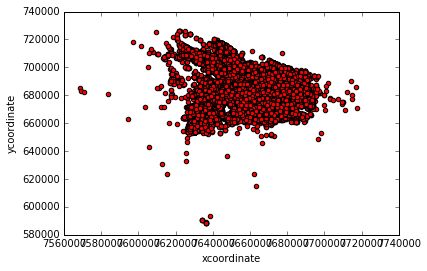

In [53]:
# df.plot.scatter(x='xcoordinate', y='ycoordinate', c='r')
df.plot(kind='scatter', x='xcoordinate', y='ycoordinate', c='r')

from matplotlib import pyplot as plt
plt.show()

In [54]:
df.std()

record_id      63997.072010
xcoordinate    16113.946724
ycoordinate    11582.723344
dtype: float64

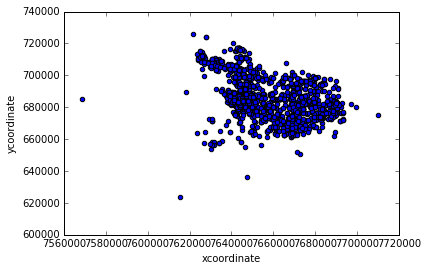

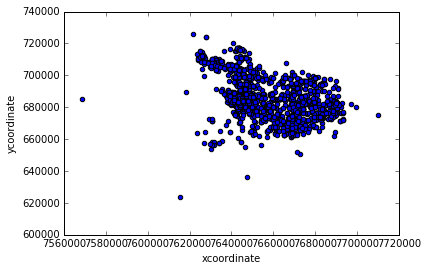

In [57]:
trespasses.plot(kind='scatter', x='xcoordinate', y='ycoordinate')
plt.show()

In [79]:
colornums = mask.astype(int)
# print(type(colornums))
# colornums?
# print(colornums.__dict__)
# print(colornums)

In [80]:
# colornums.index = pd.Series(colornums.index).apply(chr)
colornums

0        0
1        0
2        0
3        0
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
61467    0
61468    0
61469    0
61470    0
61471    0
61472    0
61473    0
61474    0
61475    0
61476    0
61477    0
61478    0
61479    0
61480    0
61481    0
61482    0
61483    0
61484    0
61485    0
61486    0
61487    0
61488    0
61489    0
61490    0
61491    0
61492    0
61493    0
61494    0
61495    0
61496    0
Name: major_offense_type, Length: 61497, dtype: int64

In [81]:
colors = np.array(['b', 'r'])[colornums]
colors

array(['b', 'b', 'b', ..., 'b', 'b', 'b'],
      dtype='<U1')

In [82]:
df.plot(kind='scatter', x='xcoordinate', y='ycoordinate', c=colors)

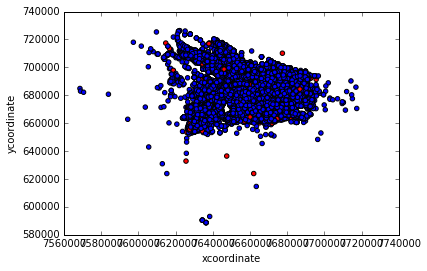

In [84]:
plt.show()

In [86]:
df.sample(100).plot.scatter(x='xcoordinate', y='ycoordinate')

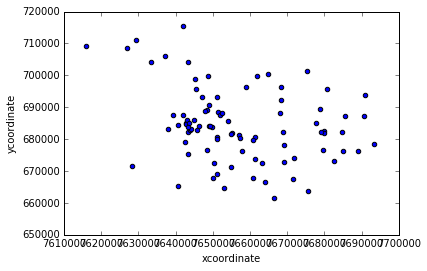

In [87]:
plt.show()

In [89]:
df.xcoordinate.hist(bins=20)

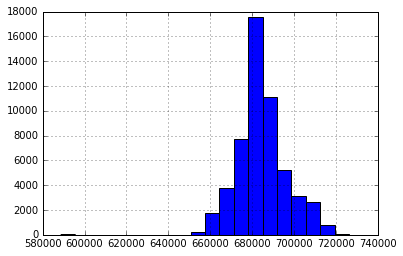

In [91]:
df.ycoordinate.hist(bins=20)
plt.show()

In [92]:
df.plot?


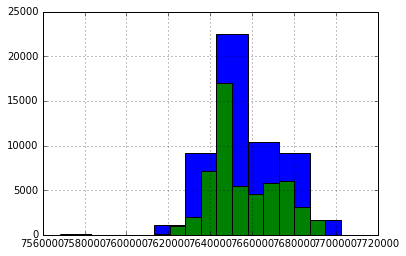

In [90]:
plt.show()


In [93]:
df.plot.density(x='xcoordinate', y='ycoordinate')

In [95]:
!pip install mpld3
import mpld3


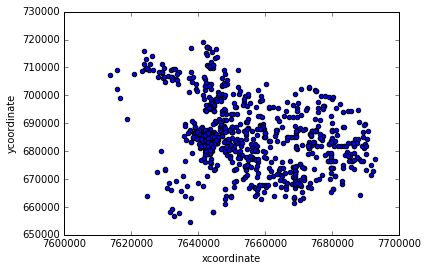

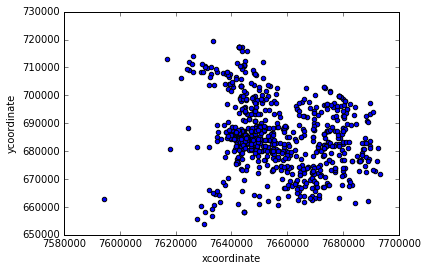

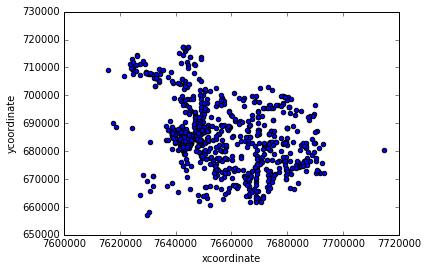

In [99]:
df.sample(1000).plot.scatter(x='xcoordinate', y='ycoordinate')
mpld3.enable_notebook()
plt.show()

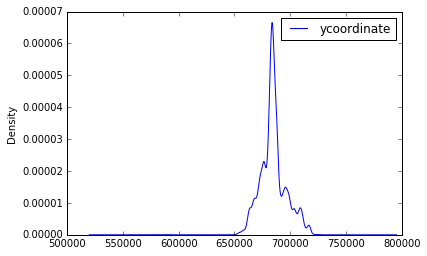

In [94]:
plt.show()

In [ ]:


from sklearn import datasets

iris_dataset = datasets.load_iris()
X = iris_dataset.data
Y = iris_dataset.target

iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)